# APDW2022 python for scattering tutorial

Contents:  
[Importing libraries](#imports)  
[Loading data](#loading)  
[Plotting](#plotting)  
[_In situ_ data exercise](#insitu)  
[Interactive plotting](#interactive)  
[Heatmap plotting](#heatmap)  
[Peak finding](#peakfinding)  
[Making animations](#animation)  
[Background subtraction](#background)  
[HDF format data](#hdf)

#### Import libraries <a id='imports'></a>
In python libraries written by others are installed then imported.
Here, we import the libraries we'll use for this tutorial.:
  
numpy, matplotlib, pandas, glob, os, ipywidgets, matplotlib.animation

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
import ipywidgets


### Loading data <a id='loading'></a>
We'll get a list of files from a data folder using `glob` a standard python library. We can call functions from libraries using the `.` operator. We can call the `glob()` function from the `glob` library like so: `glob.glob()`. This is a function that returns a list of files that match a pattern. Here we use `*` to match any group of characters, allowing us to match all `.dat` files. `.` represents the current directory.

Use `glob.glob()` to read a list of all the .dat files in the `data` folder to the `files` variable, then show the list.

In [1]:
# files = ...

Our variable `files` is a list of strings. We can access elements of the list by their index (starting at 0) using square brackets.

In [3]:
# files[...]

We load one file into a pandas dataframe. Pandas (imported as `pd`) is a library for working with tabular data that uses the 'dataframe' data structure. Use the `pd.read_csv()` function to read a `.dat` file into a dataframe `df`.

The `pd.read_csv()` function has a lot of options. Here we use `sep='\s+'` to tell pandas that the columns are separated by whitespace. We use `header=None` to tell pandas that there is no header row in the file. We also use `skiprows=6` to skip the first 6 rows of the file, which contain metadata. Finally, we use `names=['q', 'I']` to give the columns names.

In [4]:
# df = ...

Dataframes have many useful methods above standard python or numpy data structures and are widely used in data science. Here we use the `head()` method to show the first 5 rows of the dataframe. The column names can be used as indexes to access columns directly in a similar way to python dictionaries - e.g. `df['tth']` will give you the x axis tth (2θ) column.

### Plotting data <a id='plotting'></a>

We can do a quick plot directly from our dataframe using the `df.plot()` function. Use `x='tth'` and `y='i'` to tell pandas which columns to use for the x and y axes.

We can make a nicer plot by accessing matplotlib functions directly. Try modifying the code below to change features of the plot.

See here for some useful cheatsheets: https://matplotlib.org/cheatsheets/

In [ ]:
# Define a figure
plt.figure(figsize=(10, 6))

# Plot to the figure with various style options
plt.plot(
    df['tth'], 
    df['i'],
    marker='o',
    markersize=3,
    linewidth=0.5,
    color='orange',)

# Apply embellishments
plt.title(f'{os.path.basename(files[0])}') # os.path.basename() returns the file name from a path
plt.xlabel('2$\Theta$')
plt.ylabel('Intensity')
plt.xlim(0, 130)
plt.ylim(0, 175000)

### _In situ_ data exercise <a id='insitu'></a>

Now let's look at some _in situ_ data. Use the `glob()` to read a list of `.xy` files in `./data2/` to `files`. This is an _in situ_ diffraction dataset from the molten salt flux synthesis of a layered oxide perovskite from this paper: https://doi.org/10.1039/C6CC08133A

In [ ]:
# files = ...

It looks like these files are not in order! We'll need to sort these files by title so that they are in the correct order. However, the built in `sorted()` function doesn't work well - it orders 100 before 20, for example!

We can install a python package called `natsort` to do this for us. In Jupyter, we use `!` to run a command in the terminal. `pip` accesses a large repository of python packages online. Many packages can be installed from the terminal using the `pip install <name of package>` command.

In [ ]:
!pip install natsort

Now, import `natsort` and use the `natsort.natsorted()` function to sort the list of files.

In [ ]:
# import ...

# files = ...

Now that we have a list of files, we can load them into python. Our aim is to create a dataframe where each column corresponds to a diffraction pattern. We use a `for` loop where we iterate over every element of the list `files` sequentially.

In [ ]:
# Create an empty dataframe
insitu_data = pd.DataFrame()

# Loop through the files
for file in files:

    # Get file name to name the dataframe columns
    filename = os.path.basename(file)

    # Read the file
    data = pd.read_csv(
        file,
        sep='\s+',
        header=None,
        # skiprows=1,
        names=['tth', filename]
        )
    
    # Join the new data to the main dataframe
    insitu_data = pd.concat([insitu_data, data[filename]], axis=1)

# Find the x values (should be the same for all files)
insitu_x = data['tth']

# Show the first few lines of the dataframe
insitu_data.head()

### Interactive plotting <a id='interactive'></a>
Let's plot the diffraction patterns in an interactive plot. We'll use the `ipywidgets` library to create a slider to select the pattern being viewed.

In [ ]:
# Interactive plot using ipywidgets interact
from ipywidgets import interact

# @interact is a 'decorator' that enables the interactive plot
# we pass a range of values for function arguments to be used in interactive elements
@interact(frame=(0, len(files)-1, 1))

# Define a function that takes the interactive variables as arguments
def plot_insitu(frame):
    plt.figure(figsize=(10, 6))
    plt.plot(insitu_x, insitu_data.iloc[:,frame])
    plt.title(frame)
    plt.xlabel('2$\Theta$ ($^\circ$)')
    plt.ylabel('Intensity')
    plt.xlim(0, 9)
    plt.ylim(0, 10000)


### Heatmap plotting <a id='heatmap'></a>

We can also plot the data as a heatmap using matplotlib's `imshow()` method. We can clearly see phase transitions as precursor phases are converted to the product.

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(
    insitu_data,
    aspect='auto',
    extent=[0, len(files), insitu_x.iloc[0], insitu_x.iloc[-1]], # define the range of axis values
    )
plt.xlabel('Frame #')
plt.ylabel('2$\Theta$ ($^\circ$)')

Exercise: create an interactive heatmap plot varying `vmin` and `vmax` in the `imshow()` method, which control the dynamic range.

In [14]:
# @interact(
#     ...
# )

# def plot_insitu(...):
    

interactive(children=(FloatSlider(value=0.0, description='vmin', max=11242.443, step=1.0), FloatSlider(value=1…

### Peak finding <a id='peakfinding'></a>

Once we load our data, we can use libraries to perform a wide range of operations on our data. As an exercise, let's find diffraction peaks with scipy, a popular library containing many functions for data analysis.

In [15]:
from scipy.signal import find_peaks_cwt, argrelextrema, savgol_filter

Here we use `argrelextrema` to find maxima in the data. Exercise - try using another scipy function, `find_peaks_cwt`, and compare the results. 

(200.0, 1500.0)

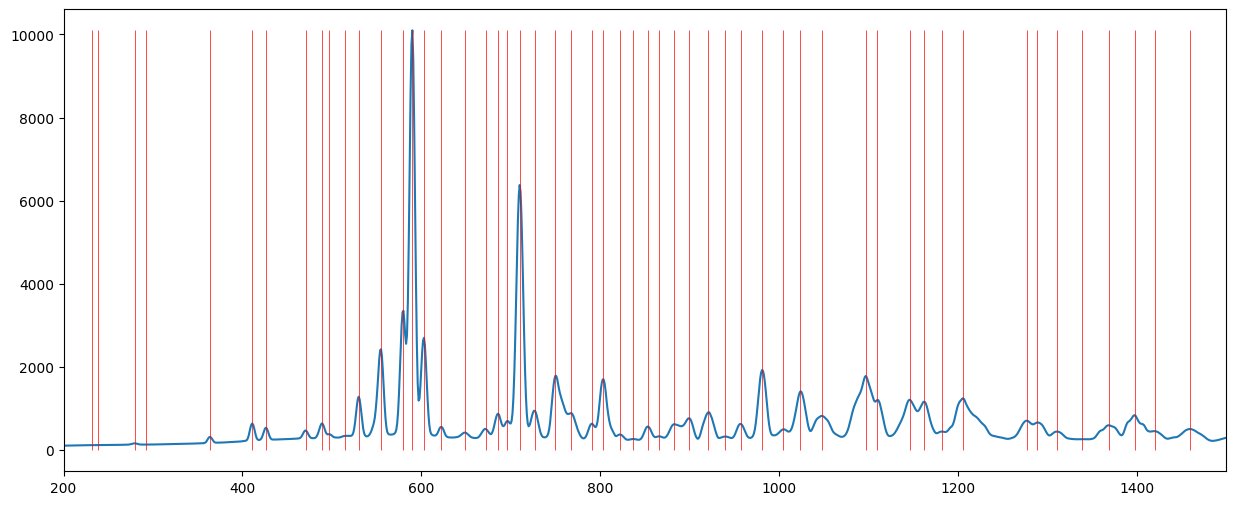

In [16]:
# peaks = find_peaks_cwt(
#     np.log(insitu_data['13.xy']), 
#     np.arange(1, 20))

# First we cast the data to a numpy array so it can be used with the peak finding functions
# We also take the log to improve the peak finding
data = np.array(np.log(insitu_data['13.xy']))

# Smooth the data with a Savitzky-Golay filter to mitigate noise
data = savgol_filter(data, 5, 3)

# Find the extrema
peaks = argrelextrema(data, np.greater, order=2)

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(insitu_data['13.xy'])

# Plot the peak positions as vertical lines
plt.vlines(peaks, 0, insitu_data['13.xy'].max(), color='red', linewidth=0.5)

# Adjust plot scaling
plt.xlim(200, 1500)
# plt.ylim(0, 1000)

Now try writing an interactive plot where you can tune various peak finding parameters and see the results in real time. You can check the scipy documentation on the algorithms for more information.

In [17]:
 # @interact(
#     ...
# )

# def plot_peakfind(...):


interactive(children=(IntSlider(value=3, description='window_length', max=20, min=1), IntSlider(value=2, descr…

### Making animations <a id='animation'></a>
Often it's useful to make an animation of in situ data for presentations. We can use the `matplotlib.animation` library to do this. Try adding a plotting command dependent on the 'frame' variable to the `animate()` function below.

Note 1: we can access dataframe columns numerically by using `datafame.iloc[:, n]` rather than the column name.
Note 2: matplotlib figures are actually composed of figures and axes. We can access these separately and plot to an axis directly using `ax.plot()`.


In [ ]:
# make a plot animation
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(frame):
    ax.clear()
    ax.plot(insitu_data.iloc[:, frame])
    ax.set_xlim(0,2000)
    ax.set_ylim(0, 10000)
    ax.set_title(f'Frame {frame}')

# Create an animation object from a plotting variable
ani = animation.FuncAnimation(fig, animate, frames=range(0, len(files)), interval=1)

ani.save('in situ diffraction.mp4', writer='ffmpeg', fps=15, dpi=600)

### Background subtraction <a id='background'></a>

There are some very effective backgrounding functions available in python libraries. Let's do some background subtraction using the pybaselines library. First, install pybaselines with a pip terminal command.

Now run the following cell then try some other baselines from the pybaselines library - see the [documentation](https://pybaselines.readthedocs.io/en/latest/) for more the different types.

In [ ]:
from pybaselines import Baseline

x = insitu_data['13.xy'].index
y = insitu_data['13.xy'].values

# Make a baseline object
baseline_fitter = Baseline(x, check_finite=False)

# Fit different types of baselines
bkg_2 = baseline_fitter.asls(y, lam=1e7, p=0.02)[0]
bkg_5 = baseline_fitter.fabc(y)[0]
bkg_6 = baseline_fitter.arpls(y)[0]
bkg_7 = baseline_fitter.iarpls(y)[0]
bkg_8 = baseline_fitter.derpsalsa(y)[0]


plt.figure(figsize=(15, 6))

plt.plot(x, y, label='raw data', lw=1.5)
plt.plot(x, bkg_2, '--', label='asls')
plt.plot(x, bkg_6, '--', label='arpls')
plt.plot(x, bkg_7, '--', label='iarpls')
plt.plot(x, bkg_8, '--', label='derpsalsa')

# plt.xlim(00, 1200)
plt.ylim(0, 2000)

plt.legend()
plt.show()

Having the data in memory, you can easily subtract the baseline. Try plotting the background subtracted data.

### HDF format data <a id='hdf'></a>

See the [next tutorial](./data3/processAzintData_WB.ipynb) for more information on processing HDF format data - this uses data from DanMAX at MAX IV.

